In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('model file/my_model.h5')

# Preprocess the input image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))  # Assuming your model expects input size (256, 256)
    image = image / 255.0  # Normalize the pixel values to [0, 1]
    return np.expand_dims(image, axis=0)  # Add batch dimension

# Make predictions on a single image
def predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    return prediction

image_path = '55.jpg'
prediction = predict_image(image_path)
print("Prediction:", prediction)




1/1 [==============================] - 0s 159ms/step
Prediction: [[0.52470326]]


In [5]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
addict                        2.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
albumentations                1.3.1
altair                        5.1.1
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrit

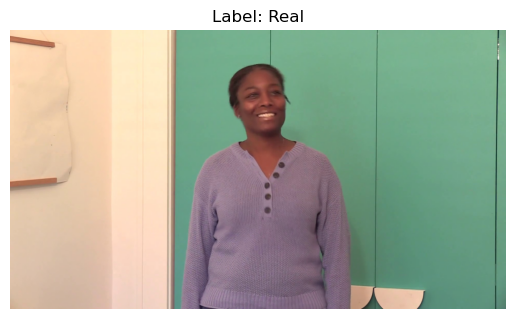

In [2]:
import cv2
import matplotlib.pyplot as plt

def display_image_with_label(image_path, label):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image from BGR to RGB (OpenCV reads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    
    # Add the label as a title
    plt.title(f"Label: {label}")
    
    # Hide the axis
    plt.axis('off')
    
    # Show the image
    plt.show()

if prediction < 0.5:
    label='Fake'
else:
    label='Real'
display_image_with_label(image_path, label)

In [3]:
import cv2
import os
import shutil
def empty_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        os.makedirs(folder_path)
    except Exception as e:
        print(f"Failed to empty folder {folder_path}. Reason: {e}")

def extract_frames(video_path, folder_path, frame_rate):
    k=0
    if os.path.exists(folder_path):
        # If the folder exists, empty its contents
        empty_folder(folder_path)
        #st.write('folder emptied')
    # Create the output folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    #print(total_frames)
    # Calculate the frame skip count
    frame_skip_count = int(video.get(cv2.CAP_PROP_FPS) / frame_rate)

    # Initialize variables
    frame_count = 1
    saved_frame_count = 1
    f=0
    # Read frames until the end of the video
    while f==0 and frame_count<=total_frames:
        ret, frame = video.read()
        frame_path = "temp.jpg"
        cv2.imwrite(frame_path, frame)
            # Check if the frame was read successfully
        if not ret:
            f=1
            break
        
        # Process the frame (placeholder for actual image processing and prediction)
        prediction_value = predict_image(frame_path)
        if prediction_value <= 0.5:
            label = 'Fake'
        else:
            label = 'Real'

        # Save frame only if frame_count is multiple of the desired frame_rate
        if frame_count % frame_rate == 0:
            # Save the frame
            frame_path = f"Video_frames/frame_{k:04d}_{label}.jpg"
            cv2.imwrite(frame_path, frame)
            count_files_in_folder(folder_path)
            k += 1

        frame_count += 1

    # Release the video object
    video.release()

In [5]:
import streamlit as st
import os
import cv2
import random
from PIL import Image
# Function to count files in folder
def count_files_in_folder(folder_path):
    if os.path.exists(folder_path):
        return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    else:
        return 0

# Function to count fake and real frames
def count_fake_real_frames(folder_path):
    fake_count = sum(1 for filename in os.listdir(folder_path) if 'Fake' in filename)
    real_count = sum(1 for filename in os.listdir(folder_path) if 'Real' in filename)
    return fake_count, real_count

# Function to display random frames with labels
def display_random_frames_with_labels(folder_path, num_frames):
    files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    if len(files) < num_frames:
        st.warning("There are not enough frames to display.")
        return
    
    st.subheader("Random Frames with Labels:")
    columns = st.columns(3)  # Use st.columns instead of st.beta_columns
    random_files = random.sample(files, num_frames)
    for i, filename in enumerate(random_files):
        frame_path = os.path.join(folder_path, filename)
        img = cv2.imread(frame_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        columns[i % 3].image(img_rgb, use_column_width=True)
        label = 'Fake' if 'Fake' in filename else 'Real'
        columns[i % 3].write(f"Label: {label}")

# Main function
def main():
    st.title("Deep Fake Detector")

    # Button to choose between uploading image or video
    choice = st.radio("Choose an option:", ("Upload Image", "Upload Video"))

    if choice == "Upload Image":
        uploaded_image = st.file_uploader("Upload an image", type=["jpg"])
        if uploaded_image is not None:
            # Display the uploaded image
            img = Image.open(uploaded_image)
            st.image(img, caption="Uploaded Image", use_column_width=True)
            img_array = np.array(img)
            save_folder = 'uploaded_img'
            if not os.path.exists(save_folder):
                os.makedirs(save_folder)
            
            # Generate a unique filename for the saved image
            save_filename = os.path.join(save_folder, '00.jpg')
            # Save the uploaded image
            #with open(save_filename, "wb") as f:
                #f.write(uploaded_image.read())
            cv2.imwrite(save_filename, cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR))
            # Placeholder for model prediction
            prediction = predict_image(save_filename)
            #accuracy = 0.95  # Replace with your model's confidence score
            if prediction < 0.5:
                label='Fake'
            else:
                label='Real'
            st.write(f"Prediction: {label}")
            #st.write(f"Accuracy: {accuracy:.2f}")

    elif choice == "Upload Video":
        uploaded_video = st.file_uploader("Upload a video", type=["mp4"])
        if uploaded_video is not None:
            # Extract frames from the video
            folder_path = 'Video_frames'
            path='uploaded_video'
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
            if not os.path.exists(path):
                os.makedirs(path)
            if os.path.exists(folder_path):
                empty_folder(folder_path)
            with open(os.path.join(path, "01.mp4"), "wb") as f:
                f.write(uploaded_video.read())
            video_path=os.path.join(path,"01.mp4")
            extract_frames(video_path, folder_path, 5)
            st.write("Video uploaded successfully.")

            # Count the number of frames extracted
            num_frames = count_files_in_folder(folder_path)
            st.write(f"Number of frames extracted: {num_frames}")

            # Count fake and real frames
            fake_count, real_count = count_fake_real_frames(folder_path)
            st.write(f"Fake frames: {fake_count}")
            st.write(f"Real frames: {real_count}")

            # Display random frames with labels
            display_random_frames_with_labels(folder_path,num_frames)

if __name__ == "__main__":
    main()
